In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray
import geopandas as gpd
import os

In [2]:
data_base_dir = "/home/zyzh0/coding/risk_evaluation/scripts/outputs"

In [15]:
n_number_list = []
for i in range(2000,2016):
    for j in range(1,10):
        n_number_list.append(np.load(os.path.join(data_base_dir, "CLCD_N_NUMBER", str(i)+"_"+str(j)+".npy")))

In [17]:
area_of_types = []
for i in range(2000,2016):
    for j in range(1,10):
        area_of_types.append(np.load(os.path.join(data_base_dir, "CLCD_AREA_OF_TYPES", str(i)+"_"+str(j)+"_area.npy")))

In [18]:
n_number_array = np.array(n_number_list)
area_of_types_array = np.array(area_of_types)

In [122]:
n_number_array[np.where(area_of_types_array==0)] = 0
C_i = (n_number_array-1)/(area_of_types_array)

/tmp/ipykernel_673648/4060624109.py:2: RuntimeWarning: divide by zero encountered in divide
  C_i = (n_number_array-1)/(area_of_types_array)


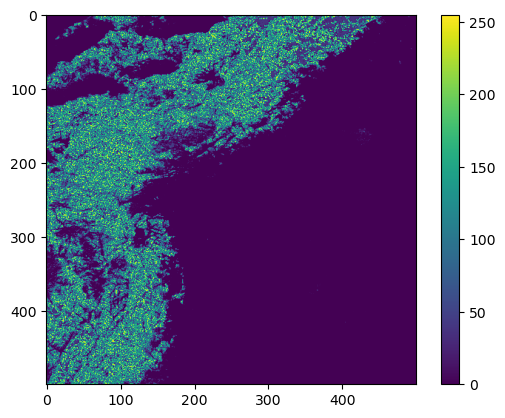

In [123]:
plt.imshow(area_of_types_array[1,500:1000,500:1000])
plt.colorbar()

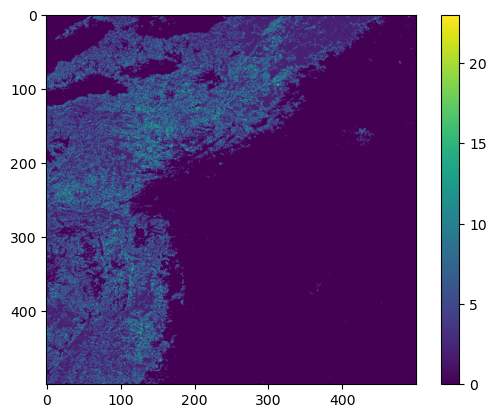

In [124]:
plt.imshow(n_number_array[1,500:1000,500:1000])
plt.colorbar()

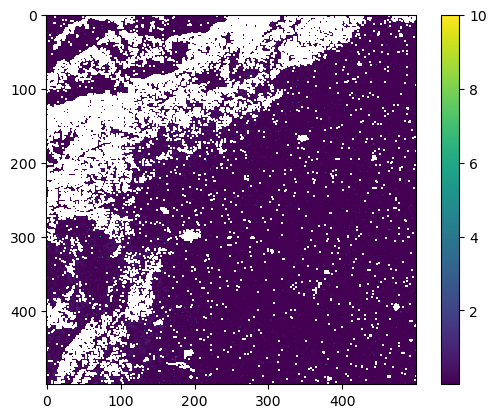

In [203]:
plt.imshow(C_i[0,500:1000,500:1000])
plt.colorbar()

In [183]:
total_area = area_of_types_array.reshape(16,9,2420,2010).sum(axis=1)
total_area_repeated_list = []
for i in range(0,16):
    to_append = total_area[i]
    for j in range(9):
        total_area_repeated_list.append(to_append)

total_area_repeated = np.array(total_area_repeated_list)

In [185]:
N_i = 0.5*np.sqrt(n_number_array/total_area_repeated)*(total_area_repeated/area_of_types_array)

/tmp/ipykernel_673648/1192702399.py:1: RuntimeWarning: invalid value encountered in divide
  N_i = 0.5*np.sqrt(n_number_array/total_area_repeated)*(total_area_repeated/area_of_types_array)
/tmp/ipykernel_673648/1192702399.py:1: RuntimeWarning: divide by zero encountered in divide
  N_i = 0.5*np.sqrt(n_number_array/total_area_repeated)*(total_area_repeated/area_of_types_array)
/tmp/ipykernel_673648/1192702399.py:1: RuntimeWarning: invalid value encountered in multiply
  N_i = 0.5*np.sqrt(n_number_array/total_area_repeated)*(total_area_repeated/area_of_types_array)


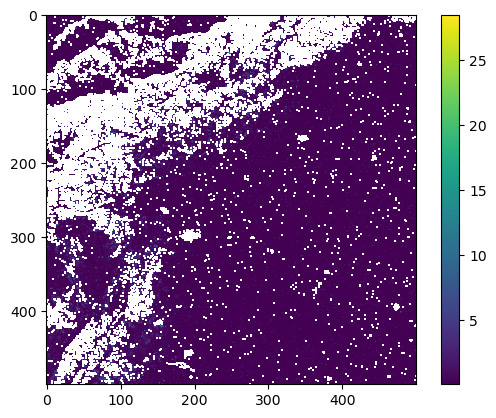

In [202]:
plt.imshow(N_i[0,500:1000,500:1000])
plt.colorbar()